In [1]:
import pandas as pd
import numpy as np
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

In [75]:
with zipfile.ZipFile("ZIP_CODE_040114.zip","r") as zip_ref:
    zip_ref.extractall()

nyc = gpd.read_file('ZIP_CODE_040114.shp')
nyc = nyc.to_crs(4326)
nyc['ZIPCODE'] = nyc['ZIPCODE'].astype('int64')

In [41]:
collisions = pd.read_csv('bk_collisions.csv')
print(collisions.shape)
collisions = collisions.dropna(subset=['LATITUDE','LONGITUDE'], how = 'all')
print(collisions.shape)

(1797, 29)
(1749, 29)


In [72]:
total = pd.read_csv('collisions.csv')
total = total.dropna(subset='BOROUGH')

total['month'] = pd.to_datetime(total['CRASH DATE']).dt.to_period('M')
dff = total.groupby(['month','BOROUGH']).agg({'COLLISION_ID':'count'}).reset_index()
dff['month'] = dff['month'].astype(str)
dfp = dff.pivot(columns = 'BOROUGH', index = 'month', values = 'COLLISION_ID')
# dfp

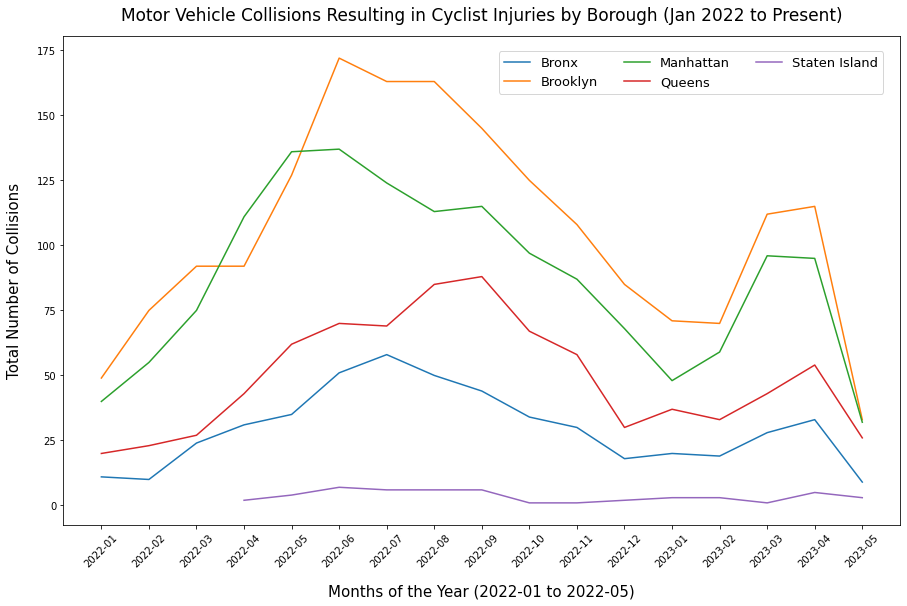

In [65]:
fig = plt.figure(figsize = (15, 9))

plt.plot(
    dfp.index, 
    dfp.values,
    label = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
    )
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(0.75, 0.925), shadow=False, ncol=3, fontsize = "13",
           loc = 'center')
plt.title('Motor Vehicle Collisions Resulting in Cyclist Injuries by Borough (Jan 2022 to Present)', pad = 15, fontsize = 17)
plt.ylabel('Total Number of Collisions', labelpad = 15, fontsize = 15)
plt.xlabel('Months of the Year (2022-01 to 2022-05)', labelpad = 15, fontsize = 15)

plt.savefig('Total Collisions by Borough.png')

plt.show()

In [76]:
cyc_inj_group = collisions.groupby(by='ZIP CODE').agg({'NUMBER OF CYCLIST INJURED':'count'}).reset_index()
topZipCycInj = cyc_inj_group.sort_values(by='NUMBER OF CYCLIST INJURED', ascending=False).iloc[0:10]
topZipCycInj['ZIP CODE'] = topZipCycInj['ZIP CODE'].astype('int64')

topZipsInj = list(topZipCycInj['ZIP CODE'].unique())
cycZipsInj = nyc[nyc['ZIPCODE'].isin(topZipsInj)]

topZipMapInj = topZipCycInj.merge(cycZipsInj, left_on='ZIP CODE', right_on='ZIPCODE', how='right')
topZipMapInj = gpd.GeoDataFrame(topZipMapInj, geometry='geometry', crs=4326)

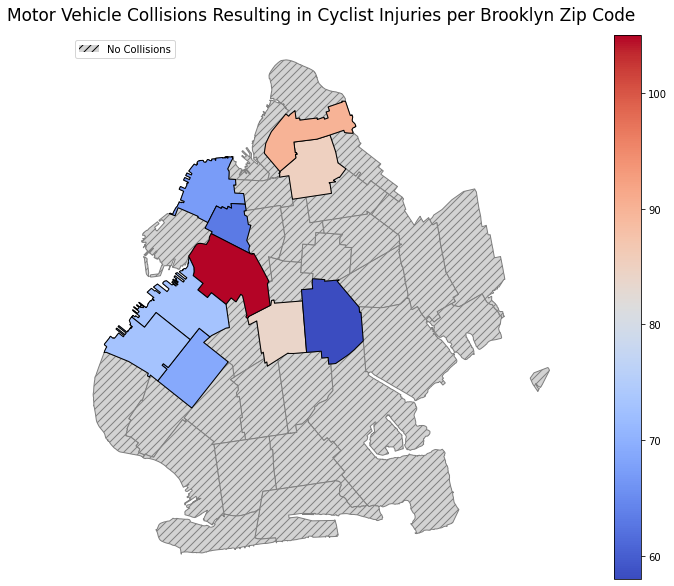

In [93]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (15,10))
nyc[nyc.COUNTY=='Kings'].plot(facecolor='lightgrey',hatch='///',edgecolor='grey',ax=ax)
topZipMapInj.plot(column = 'NUMBER OF CYCLIST INJURED', ax=ax, cmap = 'coolwarm', legend=True, edgecolor='k')

plt.title('Motor Vehicle Collisions Resulting in Cyclist Injuries per Brooklyn Zip Code', pad = 15, fontsize = 17, loc = 'center')

LegendElement = [
                mpatches.Patch(facecolor='lightgrey', hatch='///' ,label='No Collisions')
                ]

ax.axis('off')
ax.legend(handles = LegendElement, loc='upper left',fontsize=10)

plt.savefig('Brooklyn Collisions Map.png')

plt.show()

In [26]:
nyc.head(1)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."


In [33]:
nyc['coords'] = nyc['geometry'].apply(lambda x: x.representative_point().coords[:])
nyc['coords'] = [coords[0] for coords in nyc['coords']]

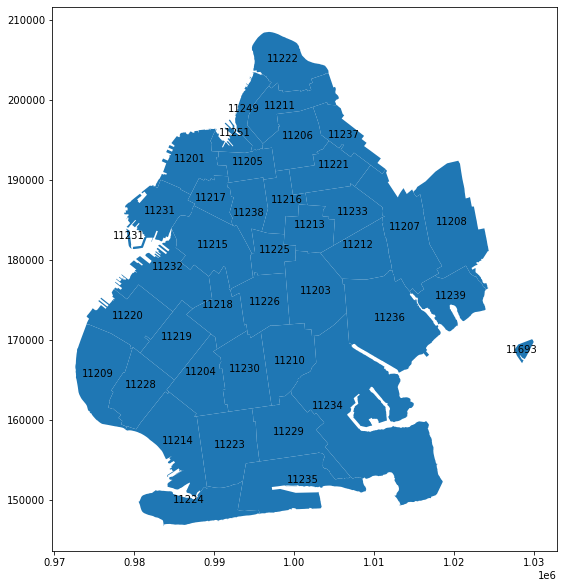

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
nyc[nyc.COUNTY=='Kings'].plot(ax=ax)
for idx, row in nyc[nyc.COUNTY=='Kings'].iterrows():
    plt.annotate(text=row['ZIPCODE'], 
                 xy=row['coords'],
                 horizontalalignment='center')

In [12]:
# collisions = pd.read_csv('collisions.csv')
# collisions = collisions[(collisions.BOROUGH=='BROOKLYN')]
# collisions = collisions.dropna(subset=['LATITUDE','LONGITUDE'], how = 'all')
# collisions.shape

In [13]:
# cyclists_injured = collisions[collisions['NUMBER OF CYCLIST INJURED']>0]
# cyclists_killed = collisions[collisions['NUMBER OF CYCLIST KILLED']>0]
# print(cyclists_injured.shape)
# print(cyclists_killed.shape)

In [14]:
# cyclists_injured.to_csv('cyclists_injured.csv')
# cyclists_killed.to_csv('cyclists_killed.csv')

In [15]:
# cyc_inj_group = cyclists_injured.groupby(by='ZIP CODE').agg({'NUMBER OF CYCLIST INJURED':'count'}).reset_index()
# topZipCycInj = cyc_inj_group.sort_values(by='NUMBER OF CYCLIST INJURED', ascending=False).iloc[0:10]
# topZipCycInj['ZIP CODE'] = topZipCycInj['ZIP CODE'].astype('int64')

# topZipsInj = list(topZipCycInj['ZIP CODE'].unique())
# # topZipsInj

In [16]:
# topZipMapInj = topZipCycInj.merge(cycZipsInj, left_on='ZIP CODE', right_on='ZIPCODE', how='right')
# topZipMapInj = gpd.GeototalFrame(topZipMapInj, geometry='geometry', crs=4326)

# fig, ax = plt.subplots(figsize = (15,10))
# nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
# topZipMapInj.plot(column = 'NUMBER OF CYCLIST INJURED', ax=ax, cmap = 'coolwarm', legend=True, edgecolor='k')
# plt.show()

In [17]:
# cyc_kill_group = cyclists_killed.groupby(by='ZIP CODE').agg({'NUMBER OF CYCLIST KILLED':'count'}).reset_index()
# topZipCycKill = cyc_kill_group.sort_values(by='NUMBER OF CYCLIST KILLED', ascending=False).iloc[0:10]
# topZipCycKill['ZIP CODE'] = topZipCycKill['ZIP CODE'].astype('int64')

# topZipsKill = list(topZipCycKill['ZIP CODE'].unique())
# cycZipsKill = nyc[nyc['ZIPCODE'].isin(topZipsKill)]

In [18]:
# topZipMapKill = topZipCycKill.merge(cycZipsKill, left_on='ZIP CODE', right_on='ZIPCODE', how='right')
# topZipMapKill = gpd.GeototalFrame(topZipMapKill, geometry='geometry', crs=4326)

# fig, ax = plt.subplots(figsize = (15,10))
# nyc[nyc.COUNTY=='Kings'].plot(ax=ax,facecolor='lightgrey', edgecolor='grey')
# topZipMapKill.plot(column = 'NUMBER OF CYCLIST KILLED', ax=ax, cmap = 'coolwarm', legend=True, edgecolor='k')
# plt.show()